<ipython-input-10-94c139bde53c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-10-94c139bde53c>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi


📊 Model Accuracy: 0.7723577235772358

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123


🧮 Confusion Matrix:
 [[18 25]
 [ 3 77]]


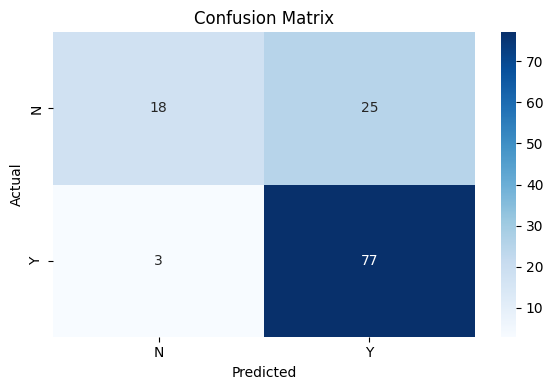

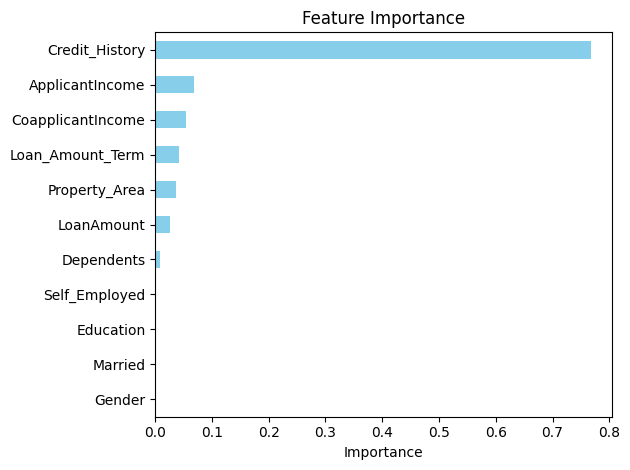


🔍 Enter details to predict loan approval (Yes=1, No=0 for binary fields):
Gender (Male=1, Female=0): 1
Married (Yes=1, No=0): 1
Dependents (0, 1, 2, 3+): 2
Education (Graduate=0, Not Graduate=1): 0
Self Employed (Yes=1, No=0): 1
Applicant Income: 1000000
Coapplicant Income: 100
Loan Amount (in thousands): 10000000000000000000000000
Loan Amount Term (in days): 365
Credit History (1.0=Good, 0.0=Bad): 1
Property Area (Urban, Rural, Semiurban): Urban

🔮 Prediction Result: ✅ Loan will be Approved


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('train.csv')

# Drop Loan_ID as it's not useful for prediction
df.drop('Loan_ID', axis=1, inplace=True)

# Handle missing values
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("\n📊 Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix:\n", cm)

# Plot confusion matrix with manual labels (adjust as per your data)
labels = ['N', 'Y']  # Usually 0 = No, 1 = Yes in Loan_Status
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Prediction from user input
def predict_from_input():
    print("\n🔍 Enter details to predict loan approval (Yes=1, No=0 for binary fields):")
    input_data = {}

    input_data['Gender'] = int(input("Gender (Male=1, Female=0): "))
    input_data['Married'] = int(input("Married (Yes=1, No=0): "))
    input_data['Dependents'] = label_encoders['Dependents'].transform([input("Dependents (0, 1, 2, 3+): ")])[0]
    input_data['Education'] = int(input("Education (Graduate=0, Not Graduate=1): "))
    input_data['Self_Employed'] = int(input("Self Employed (Yes=1, No=0): "))
    input_data['ApplicantIncome'] = float(input("Applicant Income: "))
    input_data['CoapplicantIncome'] = float(input("Coapplicant Income: "))
    input_data['LoanAmount'] = float(input("Loan Amount (in thousands): "))
    input_data['Loan_Amount_Term'] = float(input("Loan Amount Term (in days): "))
    input_data['Credit_History'] = float(input("Credit History (1.0=Good, 0.0=Bad): "))
    input_data['Property_Area'] = label_encoders['Property_Area'].transform([input("Property Area (Urban, Rural, Semiurban): ")])[0]

    user_df = pd.DataFrame([input_data])
    prediction = model.predict(user_df)[0]
    print("\n🔮 Prediction Result:", "✅ Loan will be Approved" if prediction == 1 else "❌ Loan will NOT be Approved")

# Run the prediction function
predict_from_input()
